<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/ReglaFalsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodo de la regla falsa
Omar Torres
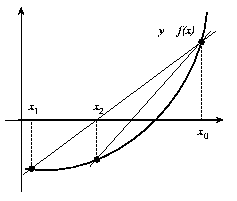

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

**Entrada de datos**

In [2]:
err = float(input("Digite el error aceptable "))
err_ref = float(input("Digite un error de refe rencia cual quieraq ejemplo err >=10 "))
xl  = float(input("Ingrese la frontera inferior del intervalo "))
xu  = float(input("Ingrese la frontera superior del intervalo "))

Digite el error aceptable 0.001
Digite un error de refe rencia cual quieraq ejemplo err >=10 10
Ingrese la frontera inferior del intervalo 0
Ingrese la frontera superior del intervalo 1


Grafica de f(x) = e^x -x
[0,1]

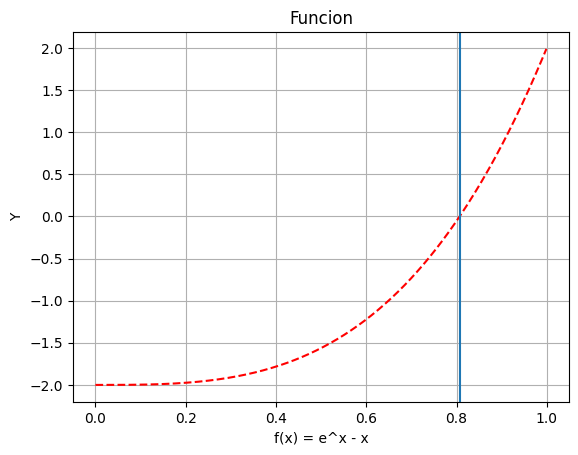

In [3]:
def graf_function():
  X = list(np.arange(xl,xu, err))
  Y=[((x**4)+ 3*(x**3) - 2) for x in X]

  plt.title("Funcion")
  plt.xlabel("f(x) = e^x - x")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x=0.806884765625, ymin=0.0, ymax=30)
  plt.grid()
  plt.show()

graf_function()

**Clase ReglaFalsa**

In [93]:
from re import S
class ReglaFalsa:
  def __init__(self, xl, xu, error, err_ref):
     self.__xl = xl
     self.__xu = xu
     self.__error=error
     self.__err_ref = err_ref
     self.__xr_i =0
     self.__fxl = 0
     self.__fxu = 1
     self.__fr =2
     self.__fr_old =100
     self.__xr_old = 0


  def __f_exp(self, x):
    fx = ((x**4)+ 3*(x**3) - 2)
    return fx

  def __cal_xr(self):
    x_num = self.__fxu*(self.__xl - self.__xu)
    x_denom = self.__fxl - self.__fxu
    xr = self.__xu - (x_num)/x_denom
    return xr

  def __errorAptual(self):
    error=0
    if self.__xr_old != 0:
      error = (  self.__xr_old - self.__xr_i)/self.__xr_old
    self.__err_actual = np.abs(error)
    return self.__err_actual

  def cal_raiz(self):
    flag = True
    err = self.__err_ref    #Se inicializa un error para entrar al while
    xr=0
    while err > self.__error:
        print(err, xr)
        fxl = self.__f_exp(self.__xl)
        fxu = self.__f_exp(self.__xu)
        self.__fxl = fxl
        self.__fxu = fxu
        self.__xr_i  = self.__xr_old
        xr = self.__cal_xr()
        self.__fr_old = self.__fr
        fr = self.__f_exp(xr)
        self.__fr = fr
        self.__xr_old = xr
        err =  self.__errorAptual()
        if (fxl)*(fxu) < 0:       #Convergencia
            if fxl*fr <0:    #[xl, xr] contiene la raiz
                self._xl = xl
                self.__xu = xr
            else:
                if fxl*fr:   #[xr, xu] contiene la raiz
                  self.__xl = xr
                  self.__xu = self.__xu
        else:
          flag = False

    return self.__xr_old

**Funcion main()**

In [94]:
def main():
  obj= ReglaFalsa(xl,xu,err, err_ref)
  print(obj.cal_raiz())
if __name__=='__main__':
   main()

10.0 0
1.0 0.5
0.3048780487804878 0.7192982456140351
0.08414292462879171 0.785382637703044
0.020534669318474703 0.8018483279613011
0.004813923467371504 0.8057270362493978
0.0011171395200991886 0.8066281524365092
0.806836823208551
